# Understanding Measurement Error in Regression

A python translation of the R code in https://statmodeling.stat.columbia.edu/2024/04/14/simulation-to-understand-measurement-error-in-regression/

**Import everything we need and set up the plotting environment**

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

sns.set_theme()

**Create our dataframe**

In [2]:
np.random.seed(123)
n = 1000
x = scipy.stats.uniform.rvs(0, 10, n)
a = 0.2
b = 0.3
sigma = 0.5
y = scipy.stats.norm.rvs(a+b*x, sigma, n)
y_star = scipy.stats.norm.rvs(y, sigma + 0.5, n)
x_star = scipy.stats.norm.rvs(x, sigma + 3.5, n)
df = pd.DataFrame({"x": x, "x_star": x_star, "y": y, "y_star": y_star})

**Plot!**

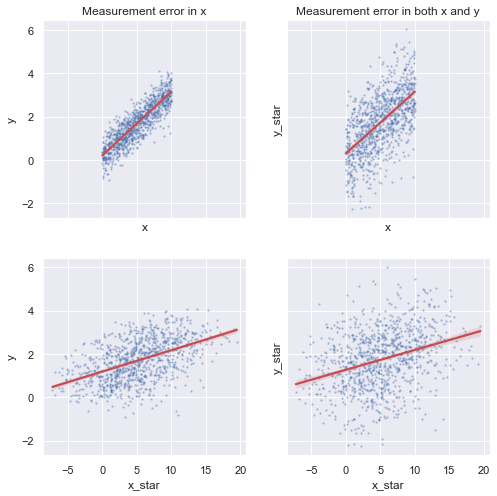

In [3]:
palette = sns.color_palette()
scatter_kws = {"alpha": 0.3, "s": 2}
line_kws = {"color": palette[3]}
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 8))
axs[0][0].set_title("No measurement error")
sns.regplot(data=df, x="x", y="y", line_kws=line_kws, scatter_kws=scatter_kws, ax=axs[0][0])
axs[0][1].set_title("Measurement error in y")
sns.regplot(data=df, x="x", y="y_star", line_kws=line_kws, scatter_kws=scatter_kws, ax=axs[0][1])
axs[0][0].set_title("Measurement error in x")
sns.regplot(data=df, x="x_star", y="y", line_kws=line_kws, scatter_kws=scatter_kws, ax=axs[1][0])
axs[0][1].set_title("Measurement error in both x and y")
sns.regplot(data=df, x="x_star", y="y_star", line_kws=line_kws, scatter_kws=scatter_kws, ax=axs[1][1]);

# Take 2

You will notice that the variance of error in the x variable is much bigger. What happens if we make x normally distributed from the start, and use the same change in variance for x_star?

In [4]:
np.random.seed(123)
n = 1000
x = scipy.stats.norm.rvs(5, 5, n)
a = 0.2
b = 0.3
sigma = 0.5
y = scipy.stats.norm.rvs(a+b*x, sigma, n)
y_star = scipy.stats.norm.rvs(y, sigma + 3.5, n)
x_star = scipy.stats.norm.rvs(x, sigma + 3.5, n)
df_2 = pd.DataFrame({"x": x, "x_star": x_star, "y": y, "y_star": y_star})

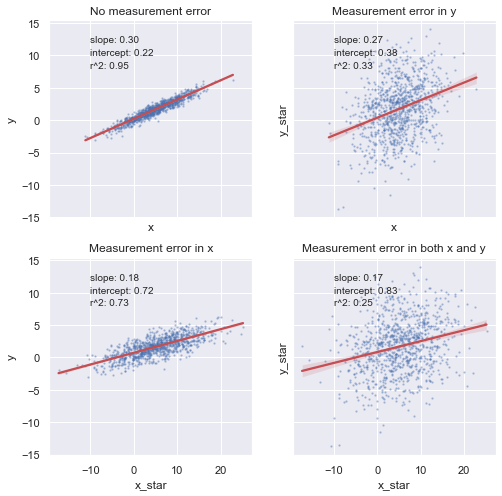

In [5]:
def plot_pair(df, ax, x, y, title, anno_anchor):
    palette = sns.color_palette()
    scatter_kws = {"alpha": 0.3, "s": 2}
    line_kws = {"color": palette[3]}
    ax.set_title(title)
    sns.regplot(data=df, x=x, y=y, line_kws=line_kws, scatter_kws=scatter_kws, ax=ax)
    lm = scipy.stats.linregress(df[x], df[y])
    ax.annotate(f"slope: {lm.slope:.2f}", (anno_anchor[0], anno_anchor[1]))
    ax.annotate(f"intercept: {lm.intercept:.2f}", (anno_anchor[0], anno_anchor[1] - anno_anchor[2]))
    ax.annotate(f"r^2: {lm.rvalue:.2f}", (anno_anchor[0], anno_anchor[1] - 2*anno_anchor[2]))
    

def plot_df(df, axs, anno_anchor):
    plot_pair(df, axs[0][0], "x", "y", "No measurement error", anno_anchor)
    plot_pair(df, axs[0][1], "x", "y_star", "Measurement error in y", anno_anchor)
    plot_pair(df, axs[1][0], "x_star", "y", "Measurement error in x", anno_anchor)
    plot_pair(df, axs[1][1], "x_star", "y_star", "Measurement error in both x and y", anno_anchor)    


fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 8))
plot_df(df_2, axs, (-10, 12, 2))

Compare to the original

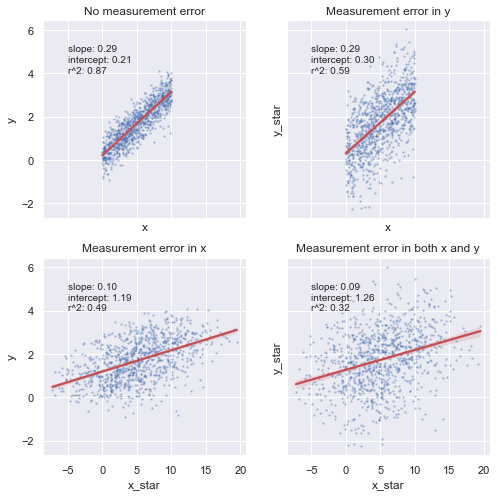

In [6]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 8))
plot_df(df, axs, (-5, 5, 0.5))